## Курсовая работа по СиАОДу 
### Выполнил студент группы БФИ2202: Керимов Магомед Керимович

#### Класс для хэш таблиц

In [75]:
class CustomHashTable:
    def __init__(self, capacity):
        self.capacity = capacity
        self.table = [None] * capacity
    
    def _hash(self, key):
        return key % self.capacity
    
    def add(self, key, value):
        index = self._hash(key)
        if self.table[index] is None:
            self.table[index] = [(key, value)]
        else:
            self.table[index].append((key, value))
    
    def retrieve(self, key):
        index = self._hash(key)
        if self.table[index] is not None:
            return [value for k, value in self.table[index] if k == key]
        return None


##### Сортировка вставкой

In [76]:
def InsertionSort(arr):
    for i in range(0, len(matrix)):
        for j in range(len(matrix[i])):
            k = j - 1
            key = matrix[i][j]
            while matrix[i][k] > key and k >= 0:
                matrix[i][k + 1] = matrix[i][k]
                k -= 1
            matrix[i][k + 1] = key
    return matrix

##### Чтение csv файла

In [77]:
import csv
import pandas as pd

def read_csv_file(filename):
    records = []
    try:
        with open(filename, 'r', encoding="utf-8", newline="") as csvfile:
            csv_reader = csv.reader(csvfile)
            next(csv_reader)  # пропускаем заголовок
            for row in csv_reader:
                records.append(row)
        return records
    except Exception as e:
        print(f'Не удалось прочитать файл: {e}')
        return []

def read_csv_with_pandas(filename):
    try:
        data = pd.read_csv(filename)
        return data
    except Exception as e:
        print(f'Не удалось прочитать файл с помощью pandas: {e}')
        return pd.DataFrame()


##### Класс для работы с csv файлом

In [96]:
import IPython.display as ip

class CSVAnalyzer:
    def __init__(self, data):
        self.data = data

    def total_revenue(self):
        return sum(int(product[-1]) for product in self.data)
    
    def total_units_sold(self):
        return sum(int(product[4]) for product in self.data)
    
    def most_popular_product(self):
        max_sales = max(int(product[4]) for product in self.data)
        hash_table = CustomHashTable(max_sales + 1)
        for product in self.data:
            sales = int(product[4])
            hash_table.add(sales, product[2])
        most_popular_product_name = hash_table.retrieve(max_sales)
        return most_popular_product_name, max_sales


    
    def highest_revenue_product(self):
        max_revenue = max(int(product[6]) for product in self.data)
        hash_table = CustomHashTable(max_revenue + 1)
        for product in self.data:
            revenue = int(product[6])
            hash_table.add(revenue, product[2])
        return hash_table.retrieve(max_revenue), max_revenue
    
    def product_percentage(self):
        total_revenue = self.total_revenue()
        return [round(int(product[6]) / total_revenue, 5) for product in self.data]


##### Вывод отчёта

In [98]:
# Чтение данных
csv_data = read_csv_file('products.csv')
pd_data = read_csv_with_pandas('products.csv')

# Анализ данных
csv_analyzer = CSVAnalyzer(csv_data)
total_revenue = csv_analyzer.total_revenue()
total_units = csv_analyzer.total_units_sold()
most_popular = csv_analyzer.most_popular_product()
highest_revenue = csv_analyzer.highest_revenue_product()
product_percentages = csv_analyzer.product_percentage()

# Формирование и вывод результатов
summary = {
    'Общая выручка': total_revenue,
    'Общее количество проданных единиц': total_units,
    'Популярный продукт': most_popular,
    'Товар с наибольшей выручкой': highest_revenue,
}

percentage_table = {
    'Название товара': pd_data['Название товара'],
    'Доля каждого товара': product_percentages,
}

summary_df = pd.DataFrame([summary])
percentage_df = pd.DataFrame(percentage_table)

print(f'Общая выручка: {total_revenue}')
print(f'Общее количество проданных единиц: {total_units}')
print(f'Товар с наибольшей выручкой: {str(highest_revenue[0])}, его выручка: {highest_revenue[1]}')
print(f'Товар, который продали наибольшее количество раз: {most_popular[0]}, его продали {str(most_popular[1])} раз')


Общая выручка: 472850
Общее количество проданных единиц: 630
Товар с наибольшей выручкой: ['Ноутбук'], его выручка: 250000
Товар, который продали наибольшее количество раз: ['Блокнот'], его продали 120 раз


,Общая выручка
0,472850


,Название товара,Доля каждого товара
0,Карандаши,0.01057
1,Ручки,0.00106
2,Конструктор LEGO,0.10574
3,Ноутбук,0.52871
4,компьютерная мышь,0.01480
5,Клавиатура,0.09517
6,Фломастеры,0.00423
7,Калькулятор,0.00529
8,Флеш-накопитель,0.04758
9,Пазл,0.00634


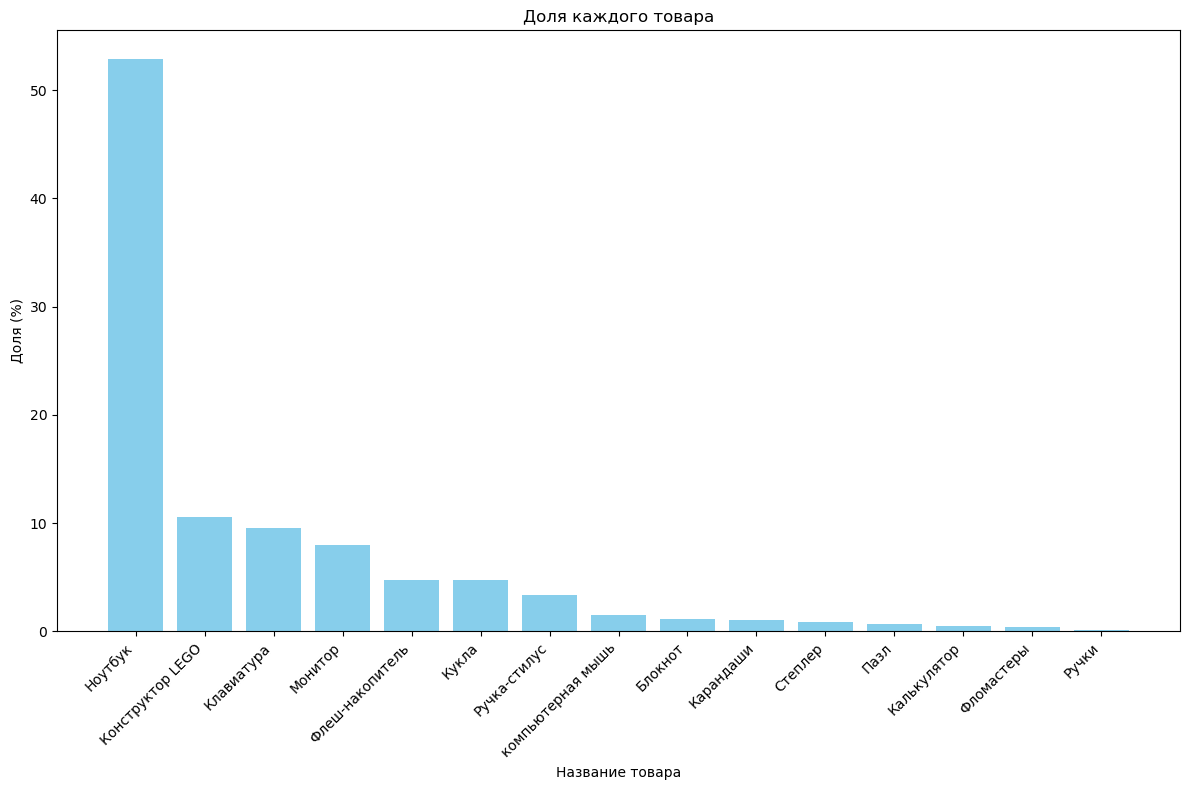

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_product_shares(data, shares):
    product_names = data['Название товара']
    shares_series = pd.Series(shares, index=product_names)
    sorted_shares = shares_series.sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(sorted_shares.index, sorted_shares.values * 100, color='skyblue')
    plt.xlabel('Название товара')
    plt.ylabel('Доля (%)')
    plt.title('Доля каждого товара')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Пример использования функции
file_path = 'products.csv'
data, shares = calculate_and_display_revenue(file_path)
plot_product_shares(data, shares)



##### Анализ для каждой из категории

In [102]:
class CategoryAnalysis:
    def __init__(self, category_name):
        self.category_name = category_name
        self.total_revenue = 0
        self.total_units_sold = 0
        self.most_popular_product = None
        self.highest_revenue_product = None

class CSVAnalyzer:
    def __init__(self, data):
        self.data = data

    def category_analysis(self):
        category_analysis_dict = {}
        for product in self.data:
            category = product[3]  # Столбец для анализа по категория
            if category not in category_analysis_dict:
                category_analysis_dict[category] = CategoryAnalysis(category)
            category_analysis = category_analysis_dict[category]
            
            category_analysis.total_revenue += int(product[6])  # выручка находится в седьмой колонке
            category_analysis.total_units_sold += int(product[4])  # количество проданных единиц находится в пятой колонке
            
            if category_analysis.most_popular_product is None or int(product[4]) > category_analysis.most_popular_product[1]:
                category_analysis.most_popular_product = (product[2], int(product[4]))  # название продукта находится в третьей колонке
            
            if category_analysis.highest_revenue_product is None or int(product[6]) > category_analysis.highest_revenue_product[1]:
                category_analysis.highest_revenue_product = (product[2], int(product[6]))  # название продукта находится в третьей колонке
        
        return category_analysis_dict

# Анализ данных
csv_analyzer = CSVAnalyzer(csv_data)
category_analysis = csv_analyzer.category_analysis()

# Формирование и вывод результатов для каждой категории
for category, analysis in category_analysis.items():
    print(f'Анализ для категории "{category}":')
    print(f'Общая выручка: {analysis.total_revenue}')
    print(f'Общее количество проданных единиц: {analysis.total_units_sold}')
    if analysis.most_popular_product:
        print(f'Популярный продукт: {analysis.most_popular_product[0]}, количество проданных единиц: {analysis.most_popular_product[1]}')
    if analysis.highest_revenue_product:
        print(f'Товар с наибольшей выручкой: {analysis.highest_revenue_product[0]}, его выручка: {analysis.highest_revenue_product[1]}')
    print('\n')


Анализ для категории "Канцелярские товары":
Общая выручка: 17000
Общее количество проданных единиц: 370
Популярный продукт: Блокнот, количество проданных единиц: 120
Товар с наибольшей выручкой: Блокнот, его выручка: 5400


Анализ для категории "Игрушки":
Общая выручка: 75350
Общее количество проданных единиц: 120
Популярный продукт: Конструктор LEGO, количество проданных единиц: 50
Товар с наибольшей выручкой: Конструктор LEGO, его выручка: 50000


Анализ для категории "Электроника":
Общая выручка: 380500
Общее количество проданных единиц: 140
Популярный продукт: Ручка-стилус, количество проданных единиц: 40
Товар с наибольшей выручкой: Ноутбук, его выручка: 250000


